# Assignment 7

In [197]:
# Your task for this assignment is to modify the code we worked on in class to calculate the orbits of a few other 
# planet-planet-sun configurations. For each case, make the same plots we did in class, namely:

# 1) x-y plot of the planet orbits,
# 2) 3D plot of planet orbits over time,
# 3) distance of planets from sun over time,
# 4) distance between the two planets over time,
# 5) speed of the planets over time,
# 6) animated x-y plot of the orbits

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [198]:
# define function for sun-planet and planet-planet forces
# u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
# x1   y1   x2   y2   v1x  v1y  v2x  v2y
# G M m1 m2 r1 r2 r12 Δx Δy
# q = sun-planet forces

def function1(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    R1 = np.sqrt(u[0]**2 + u[1]**2)
    R2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0]-u[2]
    dy = u[1]-u[3]
    R12 = np.sqrt(dx**2 + dy**2)
    q1 = -G*Ms/(R1**3)
    q2 = -G*Ms/(R2**3)
    q12 = -G*Mp2/(R12**3)
    q21 = -G*Mp1/(R12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [199]:
# Constants
G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30  # mass of sun in kg
Re = 150e9   # Distance between sun and earth in kilometers
k = (4*(np.pi**2)) / (G*Ms) # Constant of Proportionality for Kepler's Law

In [242]:
# Cases
if CASE == 1:
    Ap1 = 0.5;   # Angle w/ respect to x-axis in radians of planet 1
    Ap2 = -0.5;  # Angle w/ respect to x-axis in radians of planet 2
    fR2 = 1.0;   # What fraction of planet 1 radius is planet 2's radius?
    sv2 = 1.0;   # What sign does planet 2's velocity have?
    fv2 = 1.0;   # What fraction of planet 1's velocity is planet 2's velocity?
    fM2 = 1.0    # What fraction of planet 1's mass is planet 2's mass?
    Mp1 = 0.001*Ms             # mass of planet 1 (kg)
    Mp2 = fM2*Mp1              # mass of planet 2
    Rp1 = Re                   # Distance between sun and planet 1 (km) 
    Rp2 = fR2*Rp1              # Distance between sun and planet 2 (km)
    Pp1 = np.sqrt(k*(Rp1**3))  # Orbital period of planet 1 (time to orbit in seconds)
    Pp2 = np.sqrt(k*(Rp2**3))  # Orbital period of planet 2
    Vp1 = (2*np.pi*Rp1)/Pp1    # Orbital velocity of planet 1 (m/s)
    Vp2 = (2*np.pi*Rp2)/Pp2    # Orbital velocity of planet 1
elif CASE == 2:
    Ap1 = 0.0;
    Ap2 = 0.0;
    fR2 = 1.001;
    sv2 = 1.00;
    fv2 = 2.11;
    fM2 = 0.01
    Mp1 = 0.001*Ms  
    Mp2 = fM2*Mp1           
    Rp1 = Re         
    Rp2 = fR2*Rp1            
    Pp1 = np.sqrt(k*(Rp1**3)) 
    Pp2 = np.sqrt(k*(Rp2**3))
    Vp1 = (2*np.pi*Rp1)/Pp1   
    Vp2 = (2*np.pi*Rp2)/Pp2
elif CASE == 3:
    Ap1 = 0.0;
    Ap2 = 0.032;
    fR2 = 0.525;
    sv2 = 1.0;
    fv2 = 0.808; # Mars Velocity 24077 m/s, Earth velocity 29785 m/s
    fM2 = 0.111
    Mp1 = 0.001*Ms        
    Mp2 = fM2*Mp1           
    Rp1 = Re                  
    Rp2 = fR2*Rp1             
    Pp1 = np.sqrt(k*(Rp1**3))
    Pp2 = np.sqrt(k*(Rp2**3))
    Vp1 = (2*np.pi*Rp1)/Pp1  
    Vp2 = (2*np.pi*Rp2)/Pp2 

In [246]:
CASE = 1
CASE
print(Ap1)

0.0


In [244]:
CASE = 2
print(CASE)
print(Ap1)

2
0.0


In [245]:
CASE = 3
print(CASE)
print(Ap1)

3
0.0


In [211]:
# Setup the Time Step
Dt = 360 # seconds
t0 = 0
if CASE == 1:
    tmax = 20 * Pp1  # Update for CASE 1
elif CASE == 2:
    tmax = 20 * Pp1  # Update for CASE 2
elif CASE == 3:
    tmax = 20 * Pp1  # Update for CASE 3
t = np.arange(t0, tmax, Dt)

In [212]:
# Case 1
CASE = 1
u0_case1 = np.zeros((8,))
u0_case1[0] = np.cos(Ap1)*Rp1
u0_case1[1] = np.sin(Ap1)*Rp1
u0_case1[2] = np.cos(Ap2)*Rp2
u0_case1[3] = np.sin(Ap2)*Rp2
u0_case1[4] = 0
u0_case1[5] = Vp1
u0_case1[6] = 0
u0_case1[7] = fv2*sv2*Vp2
solve1 = solve_ivp(function1, [t0, tmax], u0_case1, method='DOP853', t_eval=t)
solve1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.600e+02 ...  6.353e+08  6.353e+08]
        y: [[ 1.500e+11  1.500e+11 ...  1.500e+11  1.500e+11]
            [ 0.000e+00  1.068e+07 ...  1.784e+09  1.794e+09]
            ...
            [ 0.000e+00 -7.653e+00 ...  2.314e+04  2.313e+04]
            [ 3.309e+04  3.309e+04 ...  2.738e+04  2.738e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 9233
     njev: 0
      nlu: 0

In [213]:
# Case 2
CASE = 2
u0_case2 = np.zeros((8,))
u0_case2[0] = np.cos(Ap1)*Rp1
u0_case2[1] = np.sin(Ap1)*Rp1
u0_case2[2] = np.cos(Ap2)*Rp2
u0_case2[3] = np.sin(Ap2)*Rp2
u0_case2[4] = 0
u0_case2[5] = Vp1
u0_case2[6] = 0
u0_case2[7] = fv2*sv2*Vp2
solve2 = solve_ivp(function1, [t0, tmax], u0_case2, method='DOP853', t_eval=t)
solve2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.600e+02 ...  6.353e+08  6.353e+08]
        y: [[ 1.500e+11  1.500e+11 ...  1.500e+11  1.500e+11]
            [ 0.000e+00  1.068e+07 ...  1.784e+09  1.794e+09]
            ...
            [ 0.000e+00 -7.653e+00 ...  2.314e+04  2.313e+04]
            [ 3.309e+04  3.309e+04 ...  2.738e+04  2.738e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 9233
     njev: 0
      nlu: 0

In [214]:
# Case 3
CASE = 3
u0_case3 = np.zeros((8,))
u0_case3[0] = np.cos(Ap1)*Rp1
u0_case3[1] = np.sin(Ap1)*Rp1
u0_case3[2] = np.cos(Ap2)*Rp2
u0_case3[3] = np.sin(Ap2)*Rp2
u0_case3[4] = 0
u0_case3[5] = Vp1
u0_case3[6] = 0
u0_case3[7] = fv2*sv2*Vp2
solve3 = solve_ivp(function1, [t0, tmax], u0_case3, method='DOP853', t_eval=t)
solve3

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.600e+02 ...  6.353e+08  6.353e+08]
        y: [[ 1.500e+11  1.500e+11 ...  1.500e+11  1.500e+11]
            [ 0.000e+00  1.068e+07 ...  1.784e+09  1.794e+09]
            ...
            [ 0.000e+00 -7.653e+00 ...  2.314e+04  2.313e+04]
            [ 3.309e+04  3.309e+04 ...  2.738e+04  2.738e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 9233
     njev: 0
      nlu: 0

Text(0.5, 1.0, 'CASE 3')

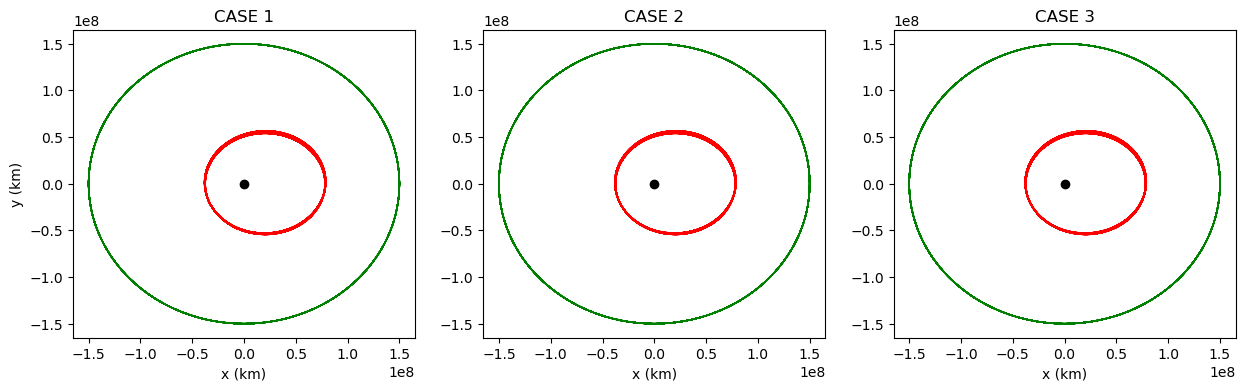

In [196]:
fig,axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].plot(0,0, 'ko', lw=2)
axes[0].plot(solve1.y[0]/1000, solve1.y[1]/1000, 'g-', lw=1) # Planet 1
axes[0].plot(solve1.y[2]/1000, solve1.y[3]/1000, 'r-', lw=1) # Planet 2
axes[0].set_xlabel('x (km)')
axes[0].set_ylabel('y (km)')
axes[0].set_title('CASE 1')

axes[1].plot(0,0, 'ko', lw=2)
axes[1].plot(solve2.y[0]/1000, solve2.y[1]/1000, 'g-', lw=1) # Planet 1
axes[1].plot(solve2.y[2]/1000, solve2.y[3]/1000, 'r-', lw=1) # Planet 2
axes[1].set_xlabel('x (km)')
axes[1].set_title('CASE 2')

axes[2].plot(0,0, 'ko', lw=2)
axes[2].plot(solve3.y[0]/1000, solve3.y[1]/1000, 'g-', lw=1) # Planet 1
axes[2].plot(solve3.y[2]/1000, solve3.y[3]/1000, 'r-', lw=1) # Planet 2
axes[2].set_xlabel('x (km)')
axes[2].set_title('CASE 3')